### Evaluating the m5 limits ###

Create "table 2" and "figure 4", from the overview paper.

This uses fiducial construction numbers for the seeing and skybrightness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import syseng_throughputs as st

In [2]:
pd.set_option('display.precision', 3)

In [3]:
# Read bandpass information.
defaultDirs = st.setDefaultDirs()
addLosses = True
# Use the X=1.0 atmosphere!
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)

In [4]:
# Standard LSST visits, standard LSST readnoise and 1 visit = 15s x 2exp
m5_std = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2)
m5_std

,nexp,exptime,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,2.0,15.0,0.92,0.808,23.052,45.303,26.524,0.023,0.035,0.470,0.038,22.719,0.792,0.533,23.449,509.804,23.9,23.4
g,2.0,15.0,0.87,0.767,22.254,463.634,28.508,0.143,0.173,0.213,0.039,24.512,0.159,0.083,24.902,830.797,25.0,24.6
r,2.0,15.0,0.83,0.734,21.198,988.627,28.361,0.124,0.140,0.126,0.039,24.565,0.081,0.040,24.479,1071.593,24.7,24.3
i,2.0,15.0,0.80,0.710,20.463,1588.281,28.171,0.105,0.114,0.096,0.039,24.517,0.052,0.024,24.103,1271.704,24.0,23.6
z,2.0,15.0,0.78,0.693,19.606,2381.945,27.782,0.073,0.078,0.068,0.039,24.354,0.035,0.016,23.540,1492.761,23.3,22.9
y,2.0,15.0,0.76,0.677,18.602,2717.112,26.818,0.030,0.035,0.171,0.039,23.825,0.031,0.014,22.537,1546.915,22.1,21.7


In [5]:
# Now also use X=1.2 atmosphere.
defaultDirs = st.setDefaultDirs()
addLosses = True
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)
# Calculate degraded seeing values (have to increase FWHM from default values)

# And calculate m5 for a standard visit. 
m5_X = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2, X=1.2)

In [6]:
# Add degradation of m5 when X=1.2 into m5_std columns (dCm_double for double visit time already there)
m5_std['m5_1.2'] = m5_X['m5']
m5_std['dM5_1.2'] = m5_std['m5'] - m5_X['m5']

In [7]:
cols = m5_std.columns
cols = ['skyMag', 'FWHMgeom', 'FWHMeff', 'gamma', 'kAtm', 'Cm', 'm5', 'dCm_infinity', 'dCm_double', 'dM5_1.2']
m5_std[cols].T

,u,g,r,i,z,y
skyMag,23.052,22.254,21.198,20.463,19.606,18.602
FWHMgeom,0.808,0.767,0.734,0.710,0.693,0.677
FWHMeff,0.920,0.870,0.830,0.800,0.780,0.760
gamma,0.038,0.039,0.039,0.039,0.039,0.039
kAtm,0.470,0.213,0.126,0.096,0.068,0.171
Cm,22.719,24.512,24.565,24.517,24.354,23.825
m5,23.449,24.902,24.479,24.103,23.540,22.537
dCm_infinity,0.792,0.159,0.081,0.052,0.035,0.031
dCm_double,0.533,0.083,0.040,0.024,0.016,0.014
dM5_1.2,0.209,0.159,0.142,0.133,0.130,0.140


In [8]:
print(m5_std[cols].T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & u & g & r & i & z & y \\
\midrule
skyMag & 23.051983 & 22.253839 & 21.197579 & 20.462795 & 19.606305 & 18.601512 \\
FWHMgeom & 0.808240 & 0.767140 & 0.734260 & 0.709600 & 0.693160 & 0.676720 \\
FWHMeff & 0.920000 & 0.870000 & 0.830000 & 0.800000 & 0.780000 & 0.760000 \\
gamma & 0.038038 & 0.038796 & 0.039067 & 0.039214 & 0.039330 & 0.039354 \\
kAtm & 0.470116 & 0.212949 & 0.126369 & 0.095764 & 0.068417 & 0.171009 \\
Cm & 22.719265 & 24.511574 & 24.564727 & 24.516816 & 24.354430 & 23.825489 \\
m5 & 23.448532 & 24.902441 & 24.478566 & 24.103234 & 23.540091 & 22.536956 \\
dCm_infinity & 0.791741 & 0.159045 & 0.080846 & 0.051845 & 0.035176 & 0.030969 \\
dCm_double & 0.533210 & 0.083120 & 0.039552 & 0.024281 & 0.015802 & 0.013657 \\
dM5_1.2 & 0.209045 & 0.159261 & 0.142214 & 0.133247 & 0.129969 & 0.140261 \\
\bottomrule
\end{tabular}



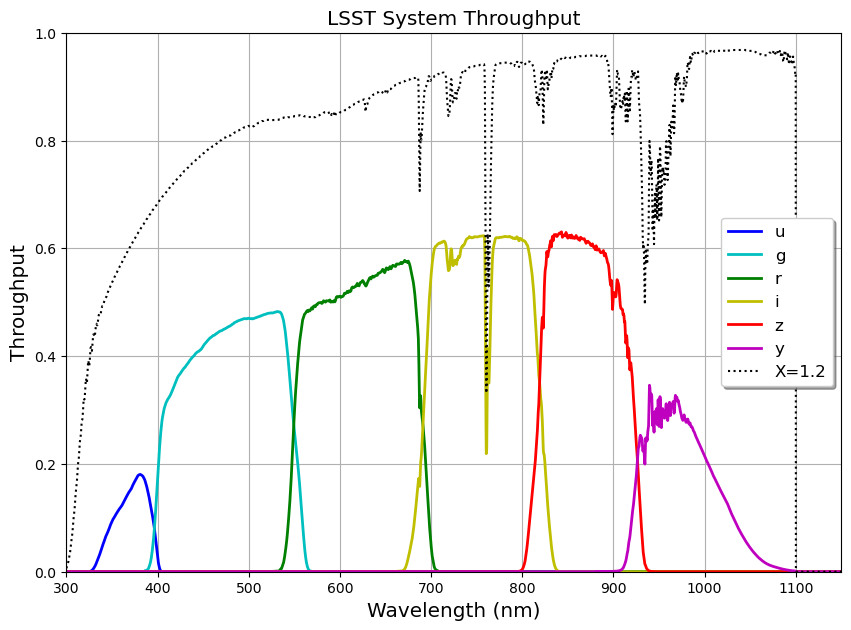

In [9]:
# Generate the plot for Figure 4, using X=1.2
plt.figure(figsize=(10, 7))
st.plotBandpasses(system, title='LSST System Throughput', addlegend=False, newfig=False)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'k:', label='X=1.2')
plt.ylabel("Throughput")
plt.legend(loc='right', numpoints=1, fancybox=True, shadow=True, fontsize='large')
#plt.savefig('Figure4.pdf', format='pdf')